# Problem Statement 
#### To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score

# Variable information

- Cement (cement) -- quantitative -- kg in a m3 mixture 
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture 
- Water (water) -- quantitative -- kg in a m3 mixture 
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture 
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture 
- Age(age) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength(strength) -- quantitative -- MPa 

#### Importing necessary libraries for data exploration

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import os

import operator

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import randint as sp_randint

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [291]:
data = pd.read_csv("concrete.csv")

In [292]:
## Checking for datatype and null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# EDA



- Univariate Analysis - ditribution
- statistics.
- Duplicates information
- correlations 
- Bivariate Analysis
- Number of 0s in each column
- skewness

In [293]:
## No Null values 
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [294]:
data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

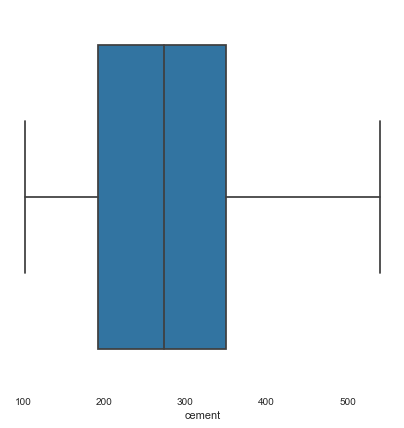

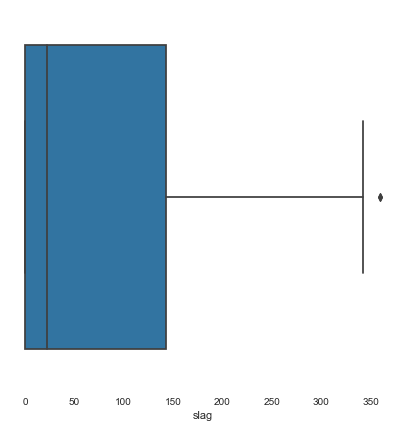

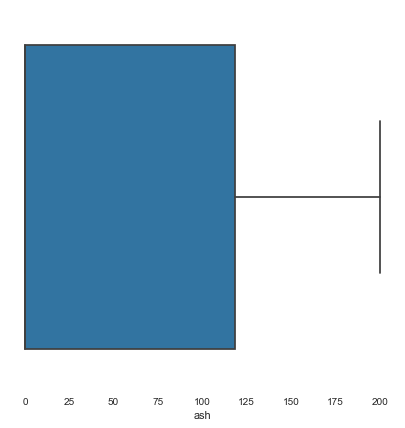

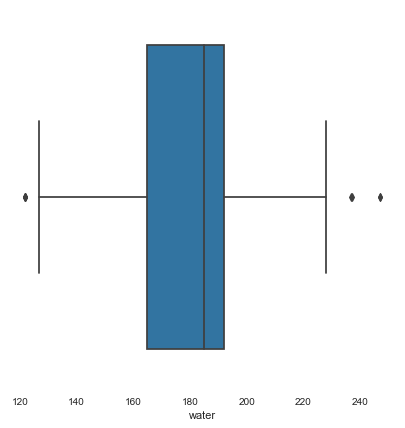

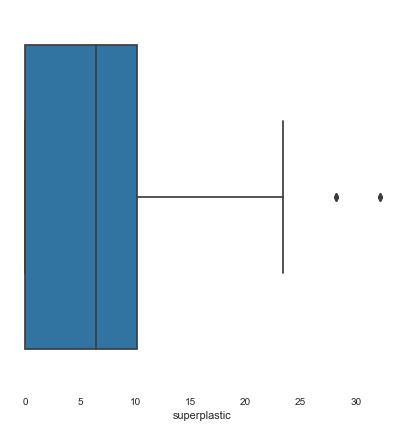

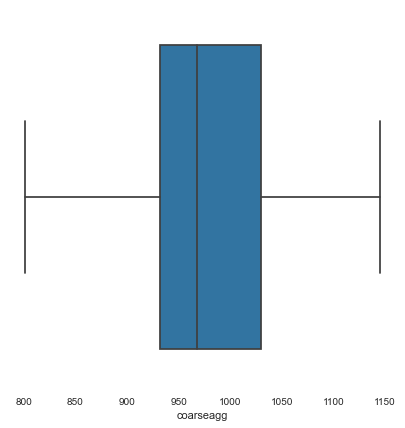

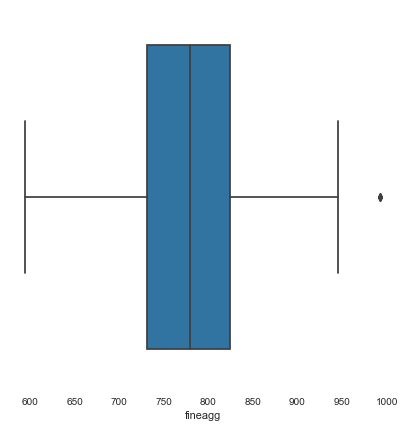

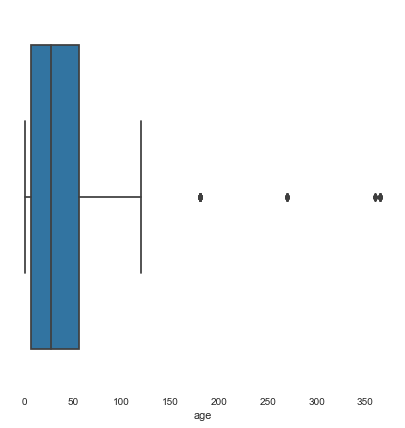

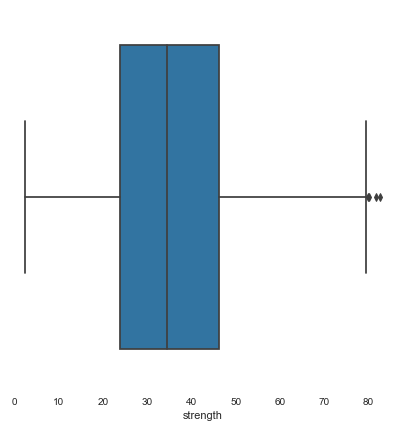

In [295]:
##Outlier detetction 
for col in data:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.boxplot(data[col])

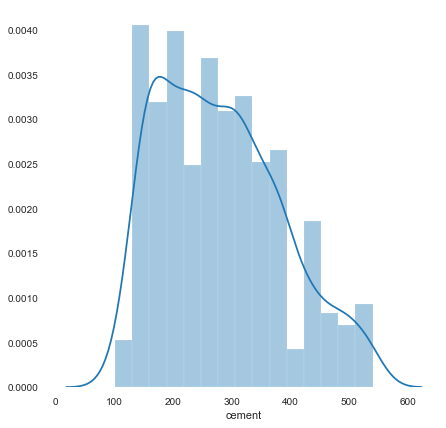

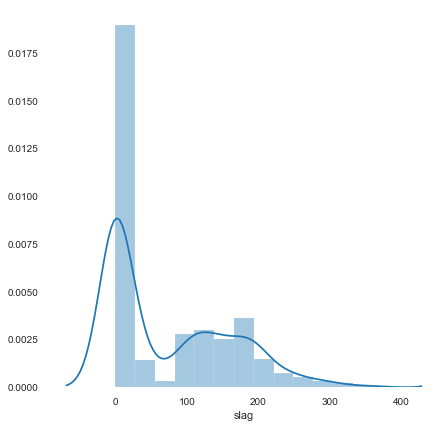

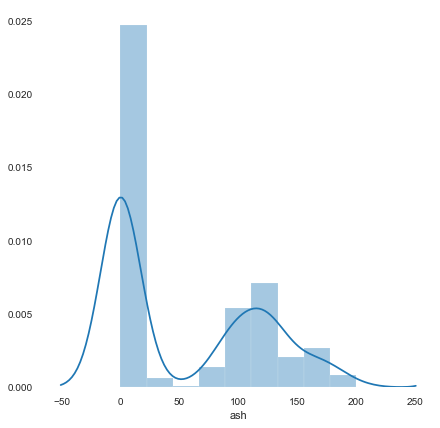

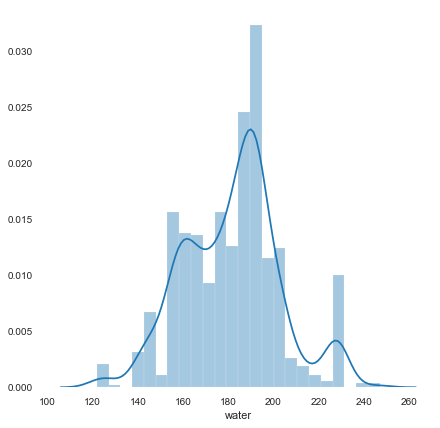

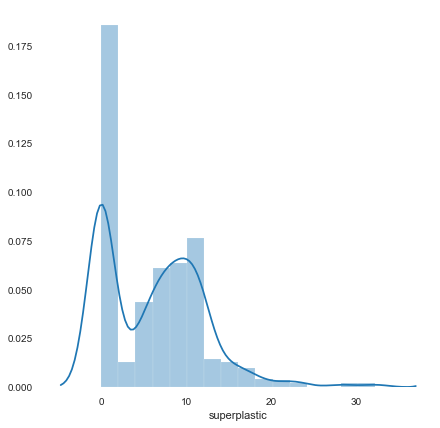

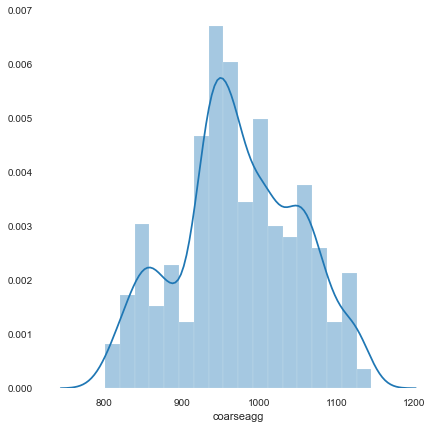

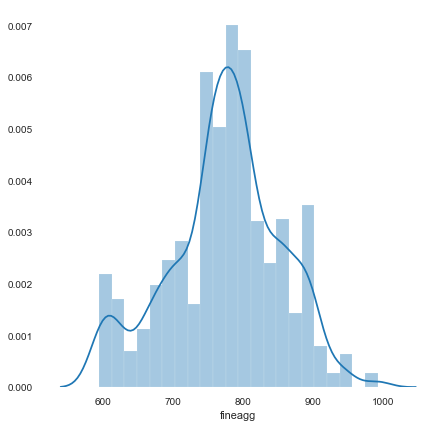

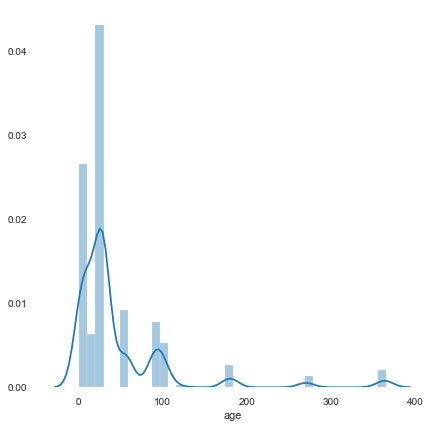

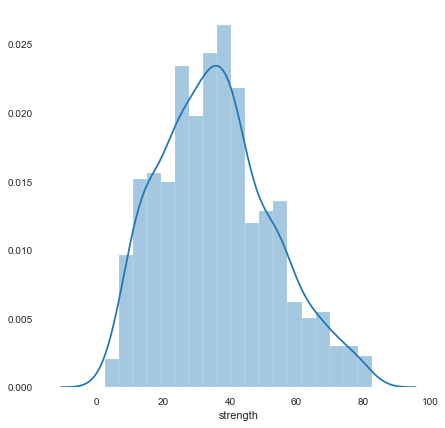

In [296]:


## Distribution 
for col in data:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.distplot(data[col], kde = True)

In [297]:
data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [298]:
import pandas_profiling 

#pandas_profiling.ProfileReport(df)  # Of you just want to show here 
#Or if you want to 
profile = pandas_profiling.ProfileReport(data)
data.profile_report()

<AxesSubplot:xlabel='strength'>

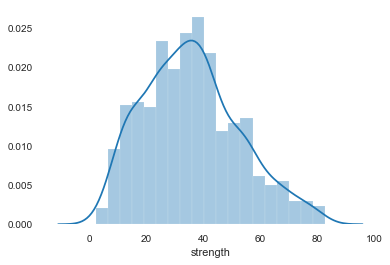

In [299]:
## Analysis of target Variable 
sns.distplot(data['strength'])

In [300]:
# Let us check the skewness:
print("Skewness = ",data['strength'].skew())

Skewness =  0.41697728841071807


### Bivariate Analysis

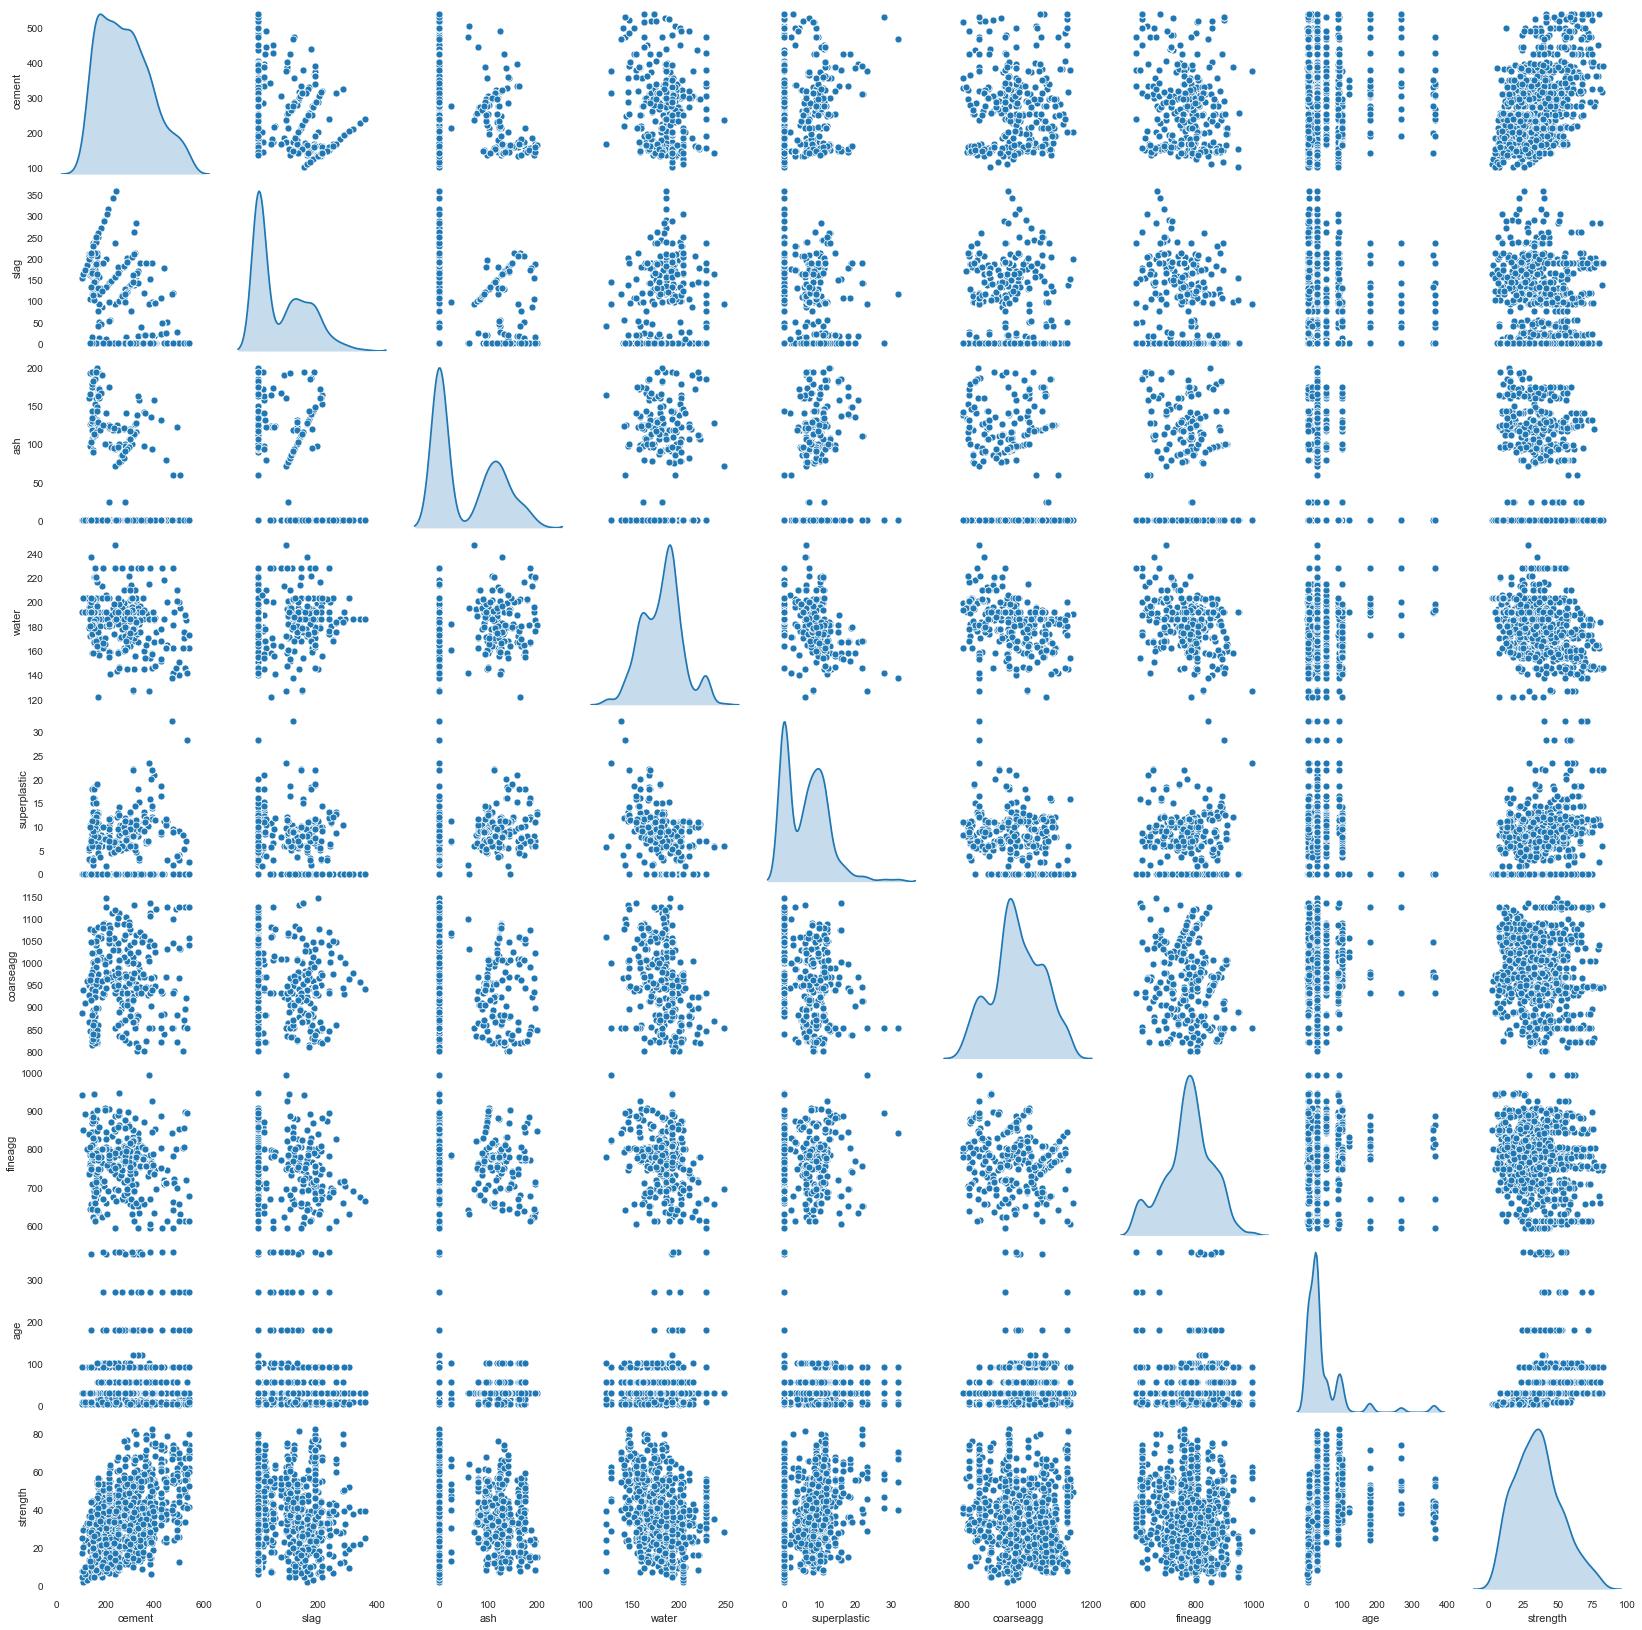

In [301]:
sns.pairplot(data,diag_kind='kde')

In [13]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

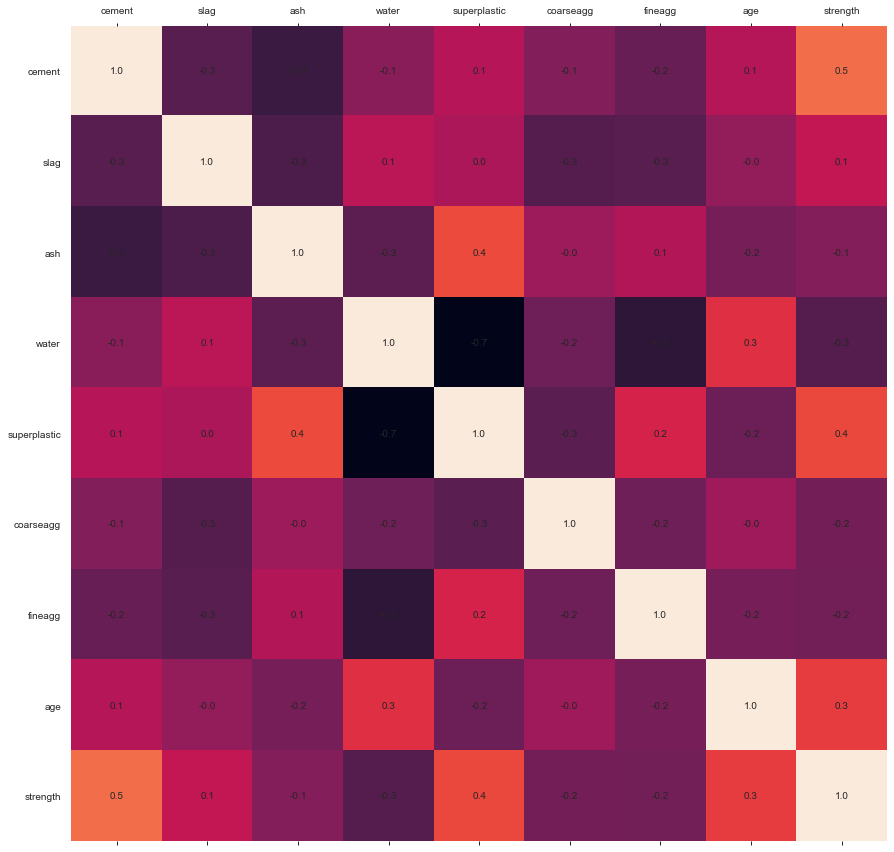

In [14]:
plot_corr(data)

- Dataset has 25 (2.4%) duplicate rows
- slag has 471 (45.7%) zeros 
- ash has 566 (55.0%) zeros
- superplastic has 379 (36.8%) zeros
- Slag and ash, age has wide difference in mean and median values,indicating mean > median.
- in cement column, min = 102, std = 104, range is 102 - 540, does the nearing value of std and min indicate something?
- In  Water column , std is < min value, shuld we consider this variable for further analysis
- Distribution seems multimodal for above variable one of the reason can be the 0s value they have.
- Looking at boxplot I can see age,fineagg,superplastic,water,slag variable has outliers.
- Some kind of negative relationship is seen between water and superplastic through correlation matrix


In [302]:
 #correlation coefficient values in each attributes.
correlation_values=data.corr()['strength']
correlation_values.abs().sort_values(ascending=False)

strength        1.000000
cement          0.497832
superplastic    0.366079
age             0.328873
water           0.289633
fineagg         0.167241
coarseagg       0.164935
slag            0.134829
ash             0.105755
Name: strength, dtype: float64

In [303]:
## Droping duplicate rows
data1 = data.drop_duplicates( keep='first')

In [304]:
data1

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1005 rows x 9 columns]

In [305]:
data1.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

# Features Tranformation / Features Engineering 

In [306]:
cement_Log =np.log(data1['cement'] +1)
slag_Log =np.log(data1['slag'] +1)
ash_Log =np.log(data1['ash'] +1)
water_Log =np.log(data1['water'] +1)
superplastic_Log =np.log(data1['superplastic'] +1)
coarseagg_Log =np.log(data1['coarseagg'] +1)
fineagg_Log =np.log(data1['fineagg'] +1)
strength_Log =np.log(data1['strength'] +1)
age_Log =np.log(data1['age'] +1)


In [307]:
data1['cement_Log']=cement_Log
data1['slag_Log']=slag_Log
data1['ash_Log']=ash_Log
data1['superplastic_Log']=superplastic_Log
data1['coarseagg_Log']=coarseagg_Log
data1['fineagg_Log']=fineagg_Log
data1['strength_Log']=strength_Log
data1['age_Log']=age_Log


C:\Users\16099\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\16099\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\16099\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [308]:
data1.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'cement_Log', 'slag_Log', 'ash_Log',
       'superplastic_Log', 'coarseagg_Log', 'fineagg_Log', 'strength_Log',
       'age_Log'],
      dtype='object')

In [309]:
## Define X and Y variables and droping multicolinear columns
data1= data1.drop(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'] ,axis=1)

In [310]:
data1.columns

Index(['cement_Log', 'slag_Log', 'ash_Log', 'superplastic_Log',
       'coarseagg_Log', 'fineagg_Log', 'strength_Log', 'age_Log'],
      dtype='object')

In [311]:
df2 = data1

In [312]:
df2

cement_Log  slag_Log   ash_Log  superplastic_Log  coarseagg_Log  \
0       4.957938  5.361292  0.000000          0.000000       6.880179   
1       5.135210  3.765840  4.830711          2.468100       6.986382   
2       5.525453  0.000000  4.571613          1.871802       6.864743   
3       5.587249  4.744932  0.000000          0.000000       6.838405   
4       5.048573  5.217107  0.000000          2.312535       6.955020   
...          ...       ...       ...               ...            ...   
1025    4.912655  0.000000  5.117994          2.397895       6.869014   
1026    6.277207  0.000000  0.000000          3.374169       6.748877   
1027    5.625461  4.762174  4.514151          2.292535       6.769757   
1028    5.837730  3.663562  0.000000          0.000000       6.838405   
1029    6.293419  0.000000  0.000000          0.000000       7.026427   

      fineagg_Log  strength_Log   age_Log  
0        6.619406      3.430433  3.367296  
1        6.681106      3.199081  2.708050  
2        6.759487      3.408504  3.367296  
3        6.508769      3.846951  3.367296  
4        6.547789      2.959587  3.367296  
...           ...           ...       ...  
1025     6.692084      2.659560  3.367296  
1026     6.796488      3.744787  1.386294  
1027     6.645481      3.812865  3.367296  
1028     6.508769      4.026423  5.602119  
1029     6.419995      3.981736  2.079442  

[1005 rows x 8 columns]

In [313]:
from sklearn.model_selection import train_test_split

X = df2.drop('strength_Log',axis=1)     # Predictor feature columns (8 X m)
Y = df2['strength_Log']   # Predicted class (1=True, 0=False) (1 X m)



In [315]:
scaler = StandardScaler()
df2_normalized = scaler.fit_transform(X)
df2_normalized = pd.DataFrame(df2_normalized,columns = X.columns)

In [316]:
xtrain,xtest,ytrain,ytest = train_test_split(df2_normalized,Y,test_size = 0.3 , random_state=5)

In [317]:
##Linear regession 
lm = LinearRegression()
lm.fit(xtrain,ytrain)
y_predict_lm = lm.predict(xtest)

In [318]:
print(lm.score(xtrain,ytrain))
print(lm.score(xtest,ytest))

0.7808328303241173
0.7743287550240977


In [319]:
lm.coef_

array([0.31990334, 0.19855472, 0.0607169 , 0.14562398, 0.0635533 ,
       0.03705318, 0.32276515])

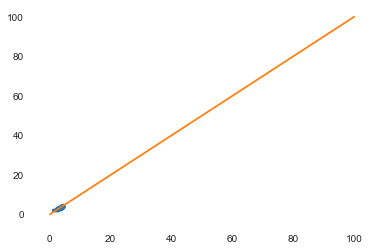

In [320]:
plt.plot(ytest, y_predict_lm, '.')
x = np.linspace(0, 100, 100)
y = x
plt.plot(x, y)
plt.show()

In [321]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix,mean_squared_error

In [322]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
print("rmse score on training set: ", rmse(ytest, y_predict_lm))

rmse score on training set:  0.2602403693490831


In [323]:
print("lm - training score ",lm.score(xtrain, ytrain))
print("lm - test score ",lm.score(xtest, ytest))

lm - training score  0.7808328303241173
lm - test score  0.7743287550240977


# Poynomial

In [324]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(xtrain)
x_test2 = poly.fit_transform(xtest)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, ytrain)

y_pred = poly_clf.predict (x_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2, y_train))

0.8599979477540721


In [325]:
print(poly_clf.score(x_test2, ytest))

0.8626415717010648


In [326]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
x_train3 = poly.fit_transform(xtrain)
x_test3 = poly.fit_transform(xtest)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train3, ytrain)

y_pred_3 = poly_clf.predict (x_test3)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train3, y_train))

0.8771877259105246


In [327]:
print(poly_clf.score(x_test3, ytest))

0.8630578199676253


In [328]:
print(x_train2.shape)
print(xtrain.shape)

(703, 29)
(703, 7)


In [329]:
print(x_train3.shape)
print(xtrain.shape)

(703, 64)
(703, 7)


### Creating the model and tuning it
1. Algorithms that you think will be suitable for this project. Use Kfold Cross
Validation to evaluate model performance. Use appropriate metrics and make a
DataFrame to compare models w.r.t their metrics.
(at least 3 algorithms, one bagging and one boosting based algorithms has to be
there). 

# Random Forest

In [330]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train, y_test = train_test_split(df2_normalized,Y,test_size = 0.3 , random_state=5)

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf1 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {rf1}')

Random Forest accuracy score = 0.8907701448919138


In [331]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
rf2 = cross_val_score(rf, X, Y, cv = 5).mean()
print(f'Cross validation score of Random forest = {rf2}')

Cross validation score of Random forest = 0.8846919249872487


In [333]:
#RandomForest Important features
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)

age_Log             0.386837
cement_Log          0.327084
superplastic_Log    0.097421
slag_Log            0.084471
fineagg_Log         0.048563
coarseagg_Log       0.037595
ash_Log             0.018031
dtype: float64

# Bagging

In [334]:
from sklearn.ensemble import BaggingRegressor
X_train,X_test,y_train, y_test = train_test_split(df2_normalized,Y,test_size = 0.3 , random_state=5)

bgcl = BaggingRegressor()

bgcl.fit(X_train, y_train)

score_bg1 = bgcl.score(X_test, y_test)

print(f'Bagging accuracy score = {score_bg1}')





Bagging accuracy score = 0.881541984180559


In [335]:
score_bg2 = cross_val_score(bgcl, X, Y, cv = 5).mean()
print(f'Cross validation score of Bagging = {score_bg2 }')

Cross validation score of Bagging = 0.8714090190942587


In [249]:
bgcl.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 7,
 'oob_score': False,
 'warm_start': True}

# Gradient Boosting

In [226]:
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train, y_test = train_test_split(df2_normalized,Y,test_size = 0.3 , random_state=5)
gbcl = GradientBoostingRegressor()
gbcl = gbcl.fit(X_train, y_train)

In [281]:
score_gb1 = gbcl.score(X_test, y_test)

print(f'Gradient Boostingaccuracy score = {score_gb1}')

Gradient Boostingaccuracy score = 0.9009841912706535


In [280]:
score_gb2 = cross_val_score(gbcl, X, Y, cv = 5).mean()
print(f'Cross validation score of Gradient Boosting =  {score_gb2}')

Cross validation score of Gradient Boosting =  0.8934294596922463


In [285]:
init_dict={'Gradient Boost':score_gb2,'Bagging':score_bg2,'Random Forest':rf2}

In [286]:
init_score_dict= pd.DataFrame(init_dict.items(), columns=['Model', 'Accuracy'])

In [287]:
init_score_dict

Model  Accuracy
0  Gradient Boost  0.893429
1         Bagging  0.871125
2   Random Forest  0.884558

Looking at the accuracy Gradient Boosting is performing better then Bagging and then Random Forest . I am doing Hyperparamter tuning in  all the three model though it is asked for best two model . the best two model will be Gradient boosting and Random forest

## Hyperparameter Model Tuning 

### Random forest 

In [258]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestRegressor(n_estimators=50)
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1,8),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion":  ["mse", "mae"]}
# run randomized search
samples = 10  # number of random samples 
rclf= RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3clf

rclf.fit(df2_normalized, Y)

 
rclf.best_params_


{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [259]:
rfr = RandomForestRegressor(bootstrap= False,
 max_depth =None,
 max_features= 5,
 min_samples_leaf= 2,
 min_samples_split= 2,
 criterion = 'mse',                           
 n_estimators= 50)


rfr_score = cross_val_score(rfr,df2_normalized, Y, cv = 5).mean()


rfr_score

0.8817902220830016

### Bagging

In [272]:
from sklearn.model_selection import GridSearchCV

param_dist = {"bootstrap": [True,False],
'bootstrap_features':[ False, True],
'max_features': sp_randint(1,8),
'oob_score': [True, False],
'warm_start': [True, False]}







bclf = BaggingRegressor(n_estimators=50)
# run randomized search
samples = 10  # number of random samples 
bgcl= RandomizedSearchCV(bclf, param_distributions=param_dist, n_iter=samples) #default cv = 3clf

bgcl.fit(df2_normalized, Y)
bgcl.best_params_

C:\Users\16099\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimate only available if warm_start=False

  FitFailedWarning)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimate only available if warm_start=False

  FitFailedWarning)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimate only available if warm_start=False

  FitFailedWarning)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536

{'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 7,
 'oob_score': True,
 'warm_start': False}

In [273]:
breg = BaggingRegressor(bootstrap= True,
 bootstrap_features= False,
 max_features= 7,
 n_estimators= 50,
 oob_score=False,
 warm_start= True)


breg_score = cross_val_score(breg,X, Y, cv = 5).mean()


breg_score

0.8831732405949321

### Gradient Boosting


In [244]:
from sklearn.model_selection import GridSearchCV
param_dist={'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth':[6,4,6],
            'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0,0.3,0.1] }
gclf = GradientBoostingRegressor(n_estimators=50)
# run randomized search
samples = 10  # number of random samples 
gcl= RandomizedSearchCV(gclf, param_distributions=param_dist, n_iter=samples)

gcl.fit(df2_normalized,Y)
gcl.best_params_


{'min_samples_leaf': 17,
 'max_features': 0.3,
 'max_depth': 6,
 'learning_rate': 0.1}

In [274]:
greg = GradientBoostingRegressor(
min_samples_leaf = 17,
max_features=0.3,
max_depth= 6,
learning_rate = 0.1,
)


greg_score = cross_val_score(greg,X, Y, cv = 5).mean()


greg_score

0.9032179684310405

In [337]:
dict={'Gradient Boost':greg_score,'Bagging':breg_score,'Random Forest':rfr_score}

In [338]:
dict

{'Gradient Boost': 0.9032179684310405,
 'Bagging': 0.8831732405949321,
 'Random Forest': 0.8817902220830016}

In [339]:
score_dict= pd.DataFrame(dict.items(), columns=['Model', 'Accuracy'])

In [340]:
score_dict

Model  Accuracy
0  Gradient Boost  0.903218
1         Bagging  0.883173
2   Random Forest  0.881790

Conclusion

- Gradient Boosting algorithm has given better accuracy.

- Best features are based on feature importance
age_Log             0.393942
cement_Log          0.333211
superplastic_Log    0.088402
slag_Log            0.083339
fineagg_Log         0.048875
coarseagg_Log       0.034767
ash_Log             0.017464